In [2]:
# prompt: Mount drive

from google.colab import drive
import os
import pandas as pd
import numpy as np

drive.mount('/content/drive')
df_sentiment = pd.read_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'sentiment_dataset.csv'))
df_sentiment.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,app_id,app_name,review_text,review_score,review_votes,admiration,amusement,anger,annoyance,approval,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cluster
0,49520,Borderlands 2,"Very good game, not like any other apocalyptic...",1,1,0.749776,0.003268,0.000072,0.000206,0.028918,...,0.000016,0.004090,0.000324,0.000336,0.003867,0.000068,0.000040,0.000193,0.000423,2
1,550,Left 4 Dead 2,best game please make l4d3 please,1,1,0.539692,0.000166,0.000036,0.000061,0.003855,...,0.000006,0.004092,0.000055,0.000066,0.001623,0.000189,0.000027,0.000086,0.006437,2
2,242760,The Forest,Early Access Review,1,1,0.000714,0.000040,0.000024,0.000091,0.005753,...,0.000005,0.000069,0.000002,0.000042,0.000012,0.000022,0.000074,0.000011,0.990735,1
3,364420,Roguelands,i have only played 6.1 hours of this game and ...,1,1,0.945537,0.000359,0.000095,0.000103,0.004008,...,0.000009,0.000702,0.001023,0.000693,0.000341,0.000037,0.000052,0.023334,0.004714,2
4,217140,Rise of the Triad,One of the best games of 2013 and 'A real con...,1,1,0.990622,0.000173,0.000109,0.000025,0.001281,...,0.000007,0.000213,0.001751,0.000036,0.000082,0.000097,0.000018,0.000082,0.000218,2


In [4]:
df_cluster = df_sentiment[['app_name', 'cluster']]
df_cluster

,app_name,cluster
0,Borderlands 2,2
1,Left 4 Dead 2,2
2,The Forest,1
3,Roguelands,2
4,Rise of the Triad,2
...,...,...
995,Game Dev Tycoon,2
996,EVE Online,0
997,Arma 3,2
998,Saints Row IV,2


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')


# Compile the regular expression only once
compiled_re = re.compile(r'[^a-zA-Z0-9\s]')

# Initialize the WordNetLemmatizer
def preprocess(df, column_name):
    def clean_text(text):
        text = compiled_re.sub('', text).lower()
        tokens = word_tokenize(text)

        return " ".join(tokens)

    # Apply the clean_text function
    df['processed_' + column_name] = df[column_name].apply(lambda x: clean_text(x) if isinstance(x, str) else x)

    return df

preprocessed_df = preprocess(df_cluster, 'app_name')
preprocessed_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-6-4d2f1b86d694>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_' + column_name] = df[column_name].apply(lambda x: clean_text(x) if isinstance(x, str) else x)


,app_name,cluster,processed_app_name
0,Borderlands 2,2,borderlands 2
1,Left 4 Dead 2,2,left 4 dead 2
2,The Forest,1,the forest
3,Roguelands,2,roguelands
4,Rise of the Triad,2,rise of the triad
...,...,...,...
995,Game Dev Tycoon,2,game dev tycoon
996,EVE Online,0,eve online
997,Arma 3,2,arma 3
998,Saints Row IV,2,saints row iv


In [ ]:
preprocessed_df.drop("app_name", axis=1, inplace=True)
preprocessed_df['app_name'] = preprocessed_df['processed_app_name']
preprocessed_df.drop("processed_app_name", axis=1, inplace=True)

In [11]:
preprocessed_df.to_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'game_clustering.csv'), index=False)

In [16]:
steam_sales_df = pd.read_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'steam-200k.csv'))
steam_sales_df

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [19]:
column_names = ['user_id', 'app_name', 'behavior', 'hours', 'nan']
steam_sales_df.columns = column_names
steam_sales_df.drop(columns=['nan'], inplace=True)
steam_sales_df

,user_id,app_name,behavior,hours
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9
...,...,...,...,...
199994,128470551,Titan Souls,play,1.5
199995,128470551,Grand Theft Auto Vice City,purchase,1.0
199996,128470551,Grand Theft Auto Vice City,play,1.5
199997,128470551,RUSH,purchase,1.0


In [20]:
steam_sales_df = preprocess(steam_sales_df, 'app_name')
steam_sales_df

,user_id,app_name,behavior,hours,processed_app_name
0,151603712,The Elder Scrolls V Skyrim,play,273.0,the elder scrolls v skyrim
1,151603712,Fallout 4,purchase,1.0,fallout 4
2,151603712,Fallout 4,play,87.0,fallout 4
3,151603712,Spore,purchase,1.0,spore
4,151603712,Spore,play,14.9,spore
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,titan souls
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,grand theft auto vice city
199996,128470551,Grand Theft Auto Vice City,play,1.5,grand theft auto vice city
199997,128470551,RUSH,purchase,1.0,rush


In [21]:
steam_sales_df['app_name'] = steam_sales_df['processed_app_name']
steam_sales_df.drop(columns=['processed_app_name'], inplace=True)
steam_sales_df

,user_id,app_name,behavior,hours
0,151603712,the elder scrolls v skyrim,play,273.0
1,151603712,fallout 4,purchase,1.0
2,151603712,fallout 4,play,87.0
3,151603712,spore,purchase,1.0
4,151603712,spore,play,14.9
...,...,...,...,...
199994,128470551,titan souls,play,1.5
199995,128470551,grand theft auto vice city,purchase,1.0
199996,128470551,grand theft auto vice city,play,1.5
199997,128470551,rush,purchase,1.0


In [22]:
steam_sales_df.to_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'steam_sales_preprocessed.csv'), index=False)

In [23]:
result_df = pd.merge(preprocessed_df, steam_sales_df, on='app_name')
result_df

,cluster,app_name,user_id,behavior,hours
0,2,borderlands 2,53875128,purchase,1.0
1,2,borderlands 2,53875128,play,0.8
2,2,borderlands 2,11373749,purchase,1.0
3,2,borderlands 2,54103616,purchase,1.0
4,2,borderlands 2,54103616,play,21.0
...,...,...,...,...,...
333112,2,game dev tycoon,156407373,play,4.9
333113,2,game dev tycoon,34901647,purchase,1.0
333114,2,game dev tycoon,34901647,play,14.5
333115,2,game dev tycoon,135400225,purchase,1.0


In [24]:
result_df.to_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'steam_sales_with_clustering.csv'), index=False)

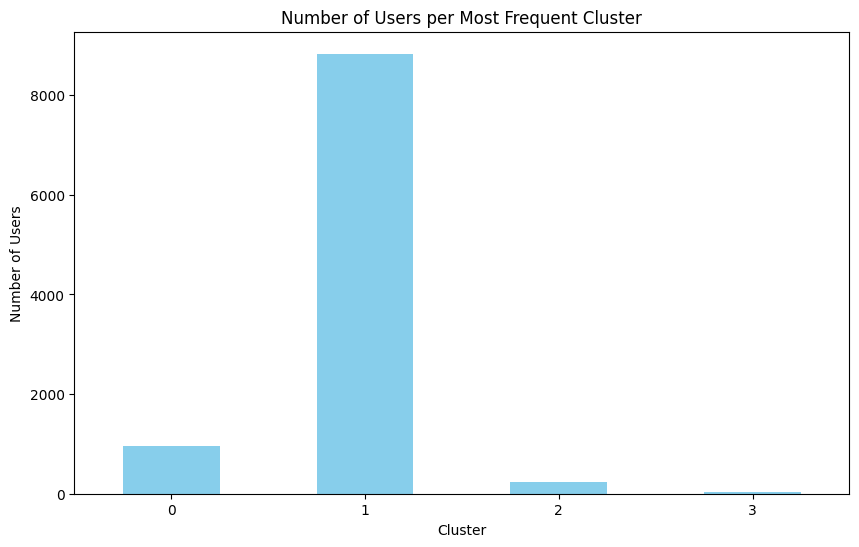

,user_id,most_freq_cluster,second_most_freq_cluster
0,5250,1,2
1,76767,1,2
2,86540,1,2
3,103360,1,1
4,144736,1,1
...,...,...,...
10051,309434439,1,2
10052,309554670,1,1
10053,309812026,1,1
10054,309824202,1,2


In [31]:
# Group by 'user_id', and get the two most frequent clusters
# This time we will use a slightly more complex function to get the second most frequent cluster as well
def get_top_clusters(x):
    counts = x.value_counts()
    if len(counts) > 1:
        return counts.index[0], counts.index[1]
    else:
        # If there is only one cluster, we return it as both most and second most frequent
        return counts.index[0], counts.index[0]

# Apply the function to the 'cluster' column
user_clusters = result_df.groupby('user_id')['cluster'].agg(get_top_clusters).reset_index()

# Split the tuples into two separate columns
user_clusters[['most_freq_cluster', 'second_most_freq_cluster']] = pd.DataFrame(
    user_clusters['cluster'].tolist(), index=user_clusters.index
)

# Drop the original combined column
user_clusters.drop('cluster', axis=1, inplace=True)

# Now, let's plot the count of users for the most frequent cluster
most_freq_cluster_counts = user_clusters['most_freq_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
most_freq_cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users per Most Frequent Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Show the updated DataFrame with most and second most frequent clusters
user_clusters


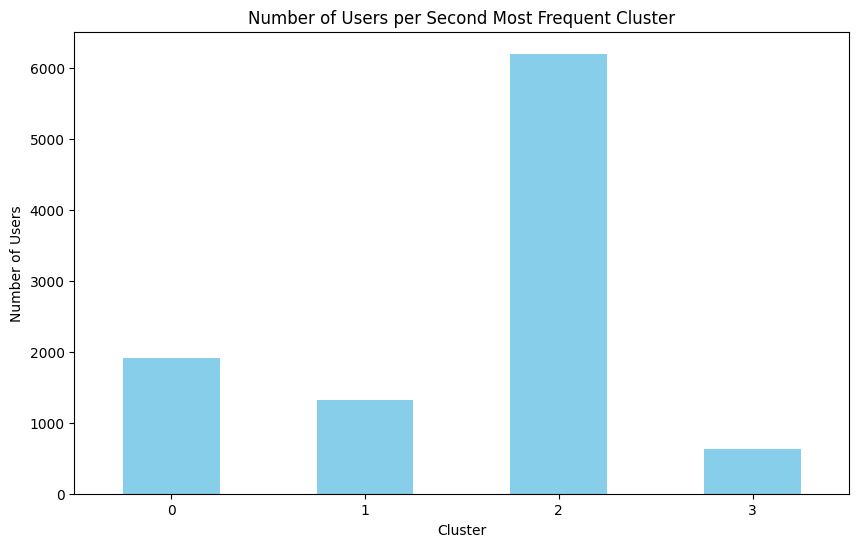

In [34]:
import matplotlib.pyplot as plt

most_freq_cluster_counts = user_clusters['second_most_freq_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
most_freq_cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users per Second Most Frequent Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


In [35]:
all_clusters = df_sentiment['cluster'].unique()

In [42]:
clustered_dict = dict()
for cluster in all_clusters:
  clustered_df = result_df[result_df['cluster'] == cluster]
  market_basket_df = clustered_df.groupby('user_id')['app_name'].agg(set).reset_index()
  clustered_dict[cluster] = market_basket_df['app_name']



In [43]:
clustered_dict[all_clusters[0]]

0       {dota 2, portal 2, counterstrike source, citie...
1       {counterstrike source, thief deadly shadows, p...
2       {la noire, borderlands 2, serious sam 3 bfe, p...
3                                  {counterstrike source}
4                                  {counterstrike source}
                              ...                        
7479                                             {dota 2}
7480                               {adventure capitalist}
7481                                             {dota 2}
7482                                             {dota 2}
7483                                             {dota 2}
Name: app_name, Length: 7484, dtype: object

In [74]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pickle

min_support = 0.05
min_confidence = 0.1
cluster_number = len(all_clusters)


cluster_rules = dict()
for cluster in all_clusters:
  print("-------------------------------")
  print("extracting rules for cluster:", cluster)
  te = TransactionEncoder()
  te_ary = te.fit(clustered_dict[all_clusters[cluster]]).transform(clustered_dict[all_clusters[cluster]])
  df = pd.DataFrame(te_ary, columns=te.columns_)

  # Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.5
  frequent_itemsets = apriori(df, min_support=min_support / cluster_number, use_colnames=True)

  # Extract rules with high confidence (here we arbitrarily set the threshold at 0.7)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence / cluster_number)

  cluster_rules[cluster] = rules
  # Display the rules
  print(rules)
  print()

with open(os.path.join('/content/drive/MyDrive/', 'Project', 'cluster_rules.pkl'),'wb') as f:
    pickle.dump(cluster_rules, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------
extracting rules for cluster: 2
                       antecedents                              consequents  \
0           (adventure capitalist)                         (clicker heroes)   
1                 (clicker heroes)                   (adventure capitalist)   
2           (adventure capitalist)                             (garrys mod)   
3                     (garrys mod)                   (adventure capitalist)   
4           (adventure capitalist)                        (team fortress 2)   
..                             ...                                      ...   
919  (garrys mod, team fortress 2)                     (terraria, warframe)   
920                     (terraria)  (warframe, team fortress 2, garrys mod)   
921                     (warframe)  (terraria, garrys mod, team fortress 2)   
922              (team fortress 2)         (terraria, warframe, garrys mod)   
923                   (garrys mod)    (terraria, warframe, team for

In [75]:
universal_transactional_df = clustered_df.groupby('user_id')['app_name'].agg(set).reset_index()
universal_transactional_df = universal_transactional_df['app_name']
universal_transactional_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                                {portal}
1       {portal, torchlight ii, borderlands 2, left 4 ...
2                                                {portal}
3       {payday 2, castle crashers, portal, borderland...
4                                         {left 4 dead 2}
                              ...                        
2747                                         {garrys mod}
2748                                         {garrys mod}
2749                                      {geometry dash}
2750                                           {terraria}
2751                                         {dirty bomb}
Name: app_name, Length: 2752, dtype: object

In [76]:
te = TransactionEncoder()
te_ary = te.fit(universal_transactional_df).transform(universal_transactional_df)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.5
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Extract rules with high confidence (here we arbitrarily set the threshold at 0.7)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

with open(os.path.join('/content/drive/MyDrive/', 'Project', 'rules.pkl'),'wb') as f:
    pickle.dump(rules, f)
# Display the rules
print(rules)
print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                     antecedents  \
0                                       (arma 3)   
1                                (borderlands 2)   
2                                   (dirty bomb)   
3                                       (arma 3)   
4                                   (garrys mod)   
...                                          ...   
5676     (garrys mod, sid meiers civilization v)   
5677                      (terraria, garrys mod)   
5678       (terraria, sid meiers civilization v)   
5679  (sid meiers civilization v, left 4 dead 2)   
5680                   (terraria, left 4 dead 2)   

                                            consequents  antecedent support  \
0                                       (borderlands 2)            0.058503   
1                                              (arma 3)            0.155887   
2                                              (arma 3)            0.117369   
3                                          (dirty bomb)    

In [79]:
def recommend_helper(rules, items, n_recommendations):
    # Filter rules with the input items as antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(items))]

    # Sort rules by confidence, lift, or other metric
    sorted_rules = filtered_rules.sort_values(by=['confidence', 'lift'], ascending=False)

    # Get the consequents from the rules as recommendations
    recommendations = sorted_rules['consequents'].apply(lambda x: list(x)).tolist()

    # Flatten the list and remove duplicates
    recommendations = list(set([item for sublist in recommendations for item in sublist]))

    # Remove input items from recommendations
    recommendations = [r for r in recommendations if r not in items]

    return recommendations[:n_recommendations]


def recommend(items, rules, cluster, n_recommendations=5):
    """
    Recommend new items based on a set of input items.

    Parameters:
    - items: a set of items for which to find recommendations
    - rules: precomputed association rules
    - n_recommendations: the number of recommendations to return

    Returns: a sorted list of recommended items
    """
    with open(os.path.join('/content/drive/MyDrive/', 'Project', 'cluster_rules.pkl'), 'rb') as file:
      cluster_rules = pickle.load(file)

    with open(os.path.join('/content/drive/MyDrive/', 'Project', 'rules.pkl'), 'rb') as file:
      universal_rules = pickle.load(file)

    if cluster is None:
      return set(recommend_helper(universal_rules, items, n_recommendations))
    else:
      return set(recommend_helper(cluster_rules[cluster], items, n_recommendations) + recommend_helper(universal_rules, items, n_recommendations))

# Example usage:
items = {'bioshock'}
recommended_items = recommend(items, rules, 1)
print(recommended_items)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'payday 2', 'rising stormred orchestra 2 multiplayer', 'castle crashers', 'portal', 'borderlands 2'}
